In [185]:
#Importing the libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
#Reading the diabetes data set 
data = pd.read_csv(r'C:\Users\prama\Downloads\ML_Project1\diabetes.csv')

In [133]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1


In [134]:
#Lets check the data set using describe method
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,761.000000,761.000000,746.000000,754.00000,762.000000,768.000000,768.000000
mean,3.845052,120.894531,69.339028,20.725361,82.152815,32.13435,0.472196,33.240885,0.348958
std,3.369578,31.972618,18.926330,15.902731,116.102469,7.56570,0.332328,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.40000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,42.500000,32.05000,0.370500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,130.000000,36.60000,0.628500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


In [135]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122,70.0,27.0,0.0,36.8,0.340,27,0
765,5,121,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126,60.0,0.0,0.0,30.1,0.349,47,1
767,1,93,70.0,31.0,0.0,30.4,0.315,23,0


In [ ]:
#Using the simple imputer , fill the nan values in data set

In [136]:
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')

In [314]:
data['BloodPressure']  = imputer.fit_transform(data[['BloodPressure','SkinThickness']])
data['SkinThickness']  = imputer.fit_transform(data[['SkinThickness']])
data['Insulin']  = imputer.fit_transform(data[['Insulin']])
data['BMI']  = imputer.fit_transform(data[['BMI']])
data['DiabetesPedigreeFunction']  = imputer.fit_transform(data[['DiabetesPedigreeFunction']])


In [138]:
#after imputing now check is there any missing values in our data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.339028,20.725361,82.152815,32.134350,0.472196,33.240885,0.348958
std,3.369578,31.972618,18.839767,15.829996,114.425261,7.496334,0.331026,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,48.500000,32.134350,0.375500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [139]:
#As per the above data we know that there is some minimum value present in glucose, bp, St, insulin,BMI,DPF.
#For filling that data of mnimum value we use below method.
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())

In [140]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.228154,26.662314,119.806189,32.427241,0.472196,33.240885,0.348958
std,3.369578,30.436016,12.082570,9.596328,92.607514,6.832641,0.331026,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.725361,82.152815,27.600000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,82.152815,32.134350,0.375500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [141]:
#Preparing the logistic regression model for the above data set, and we have already imported the libraries at the begining

In [142]:
#Lets check the plots for skeweness and outliers

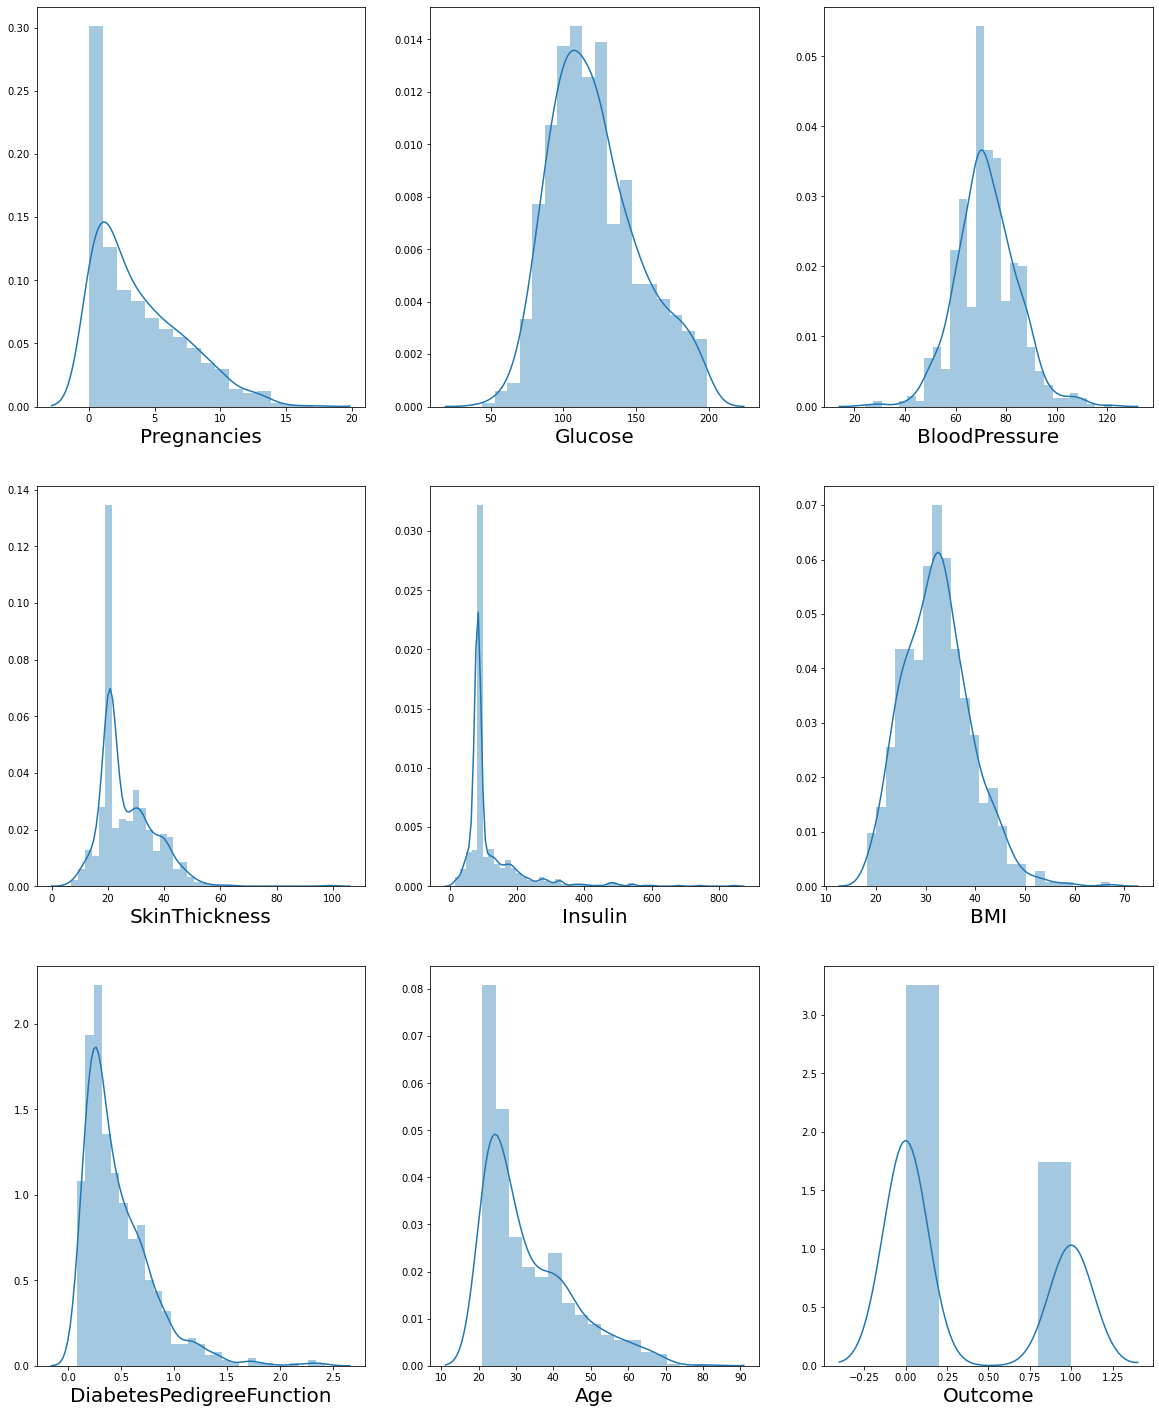

In [143]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

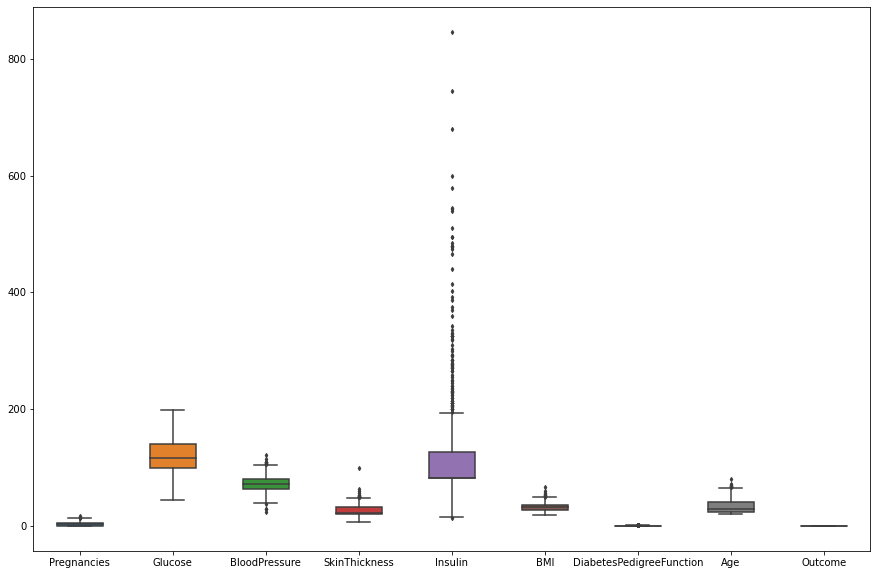

In [144]:
# checking for outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [145]:
# Reducing the outliers and skewness
q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

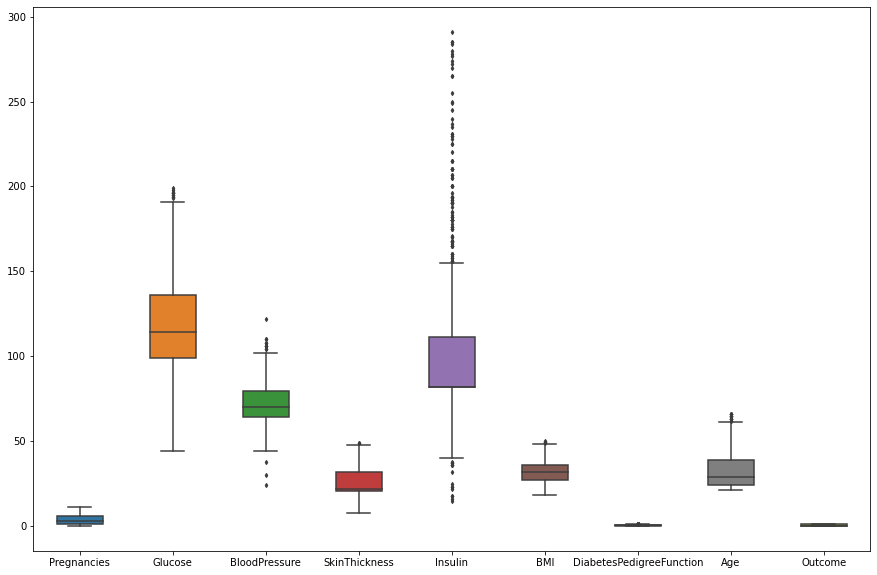

In [146]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_cleaned, width= 0.5,ax=ax,  fliersize=3)

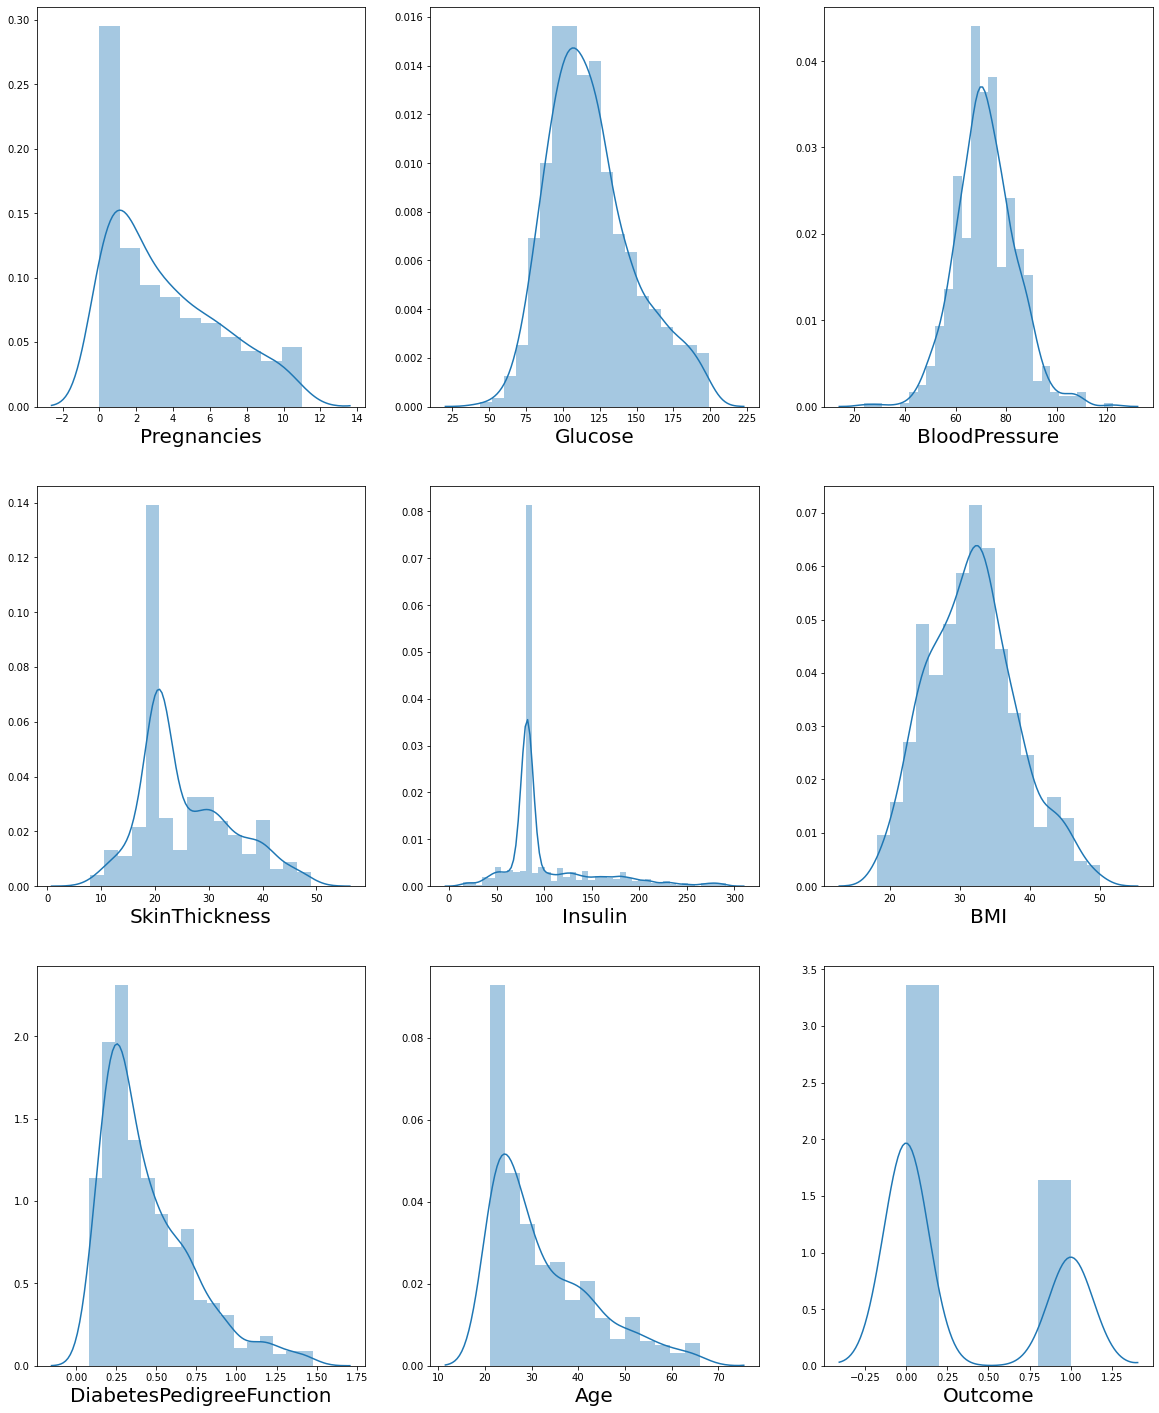

In [147]:
#After reducing outliers and skewness lets check our plots
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [148]:
#Selecting x- label and y label from the given data
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [149]:
#Lets standardise our data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [150]:
#Now check for multicollinearity
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns
vif

,vif,Features
0,1.430781,Pregnancies
1,1.349684,Glucose
2,1.248578,BloodPressure
3,1.431426,SkinThickness
4,1.258512,Insulin
5,1.537474,BMI
6,1.059379,DiabetesPedigreeFunction
7,1.608651,Age


In [151]:
#From the above vif we conclude that there in no multicollinearity in our data. let's split our data in test and training set.
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25)

In [152]:
#Prepairing the LOGISTIC REGRESSION MODEL
LR = LogisticRegression()

LR.fit(x_train,y_train)

LogisticRegression()

In [153]:
#Predicting the x_test data
y_pred = LR.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [154]:
#Finding the accuracy of the outcome
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.75

In [155]:
#To check how accurate is our model using confusion matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[107,  18],
       [ 30,  37]], dtype=int64)

In [156]:
true_positive = confusion_matrix[0][0]
false_positive = confusion_matrix[0][1]
false_negative = confusion_matrix[1][0]
true_negative = confusion_matrix[1][1]

In [157]:
#accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.75

In [158]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.856

In [159]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.781021897810219

In [160]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.816793893129771

In [161]:
#Lets find the roc curve of Logistic regression
fpr,tpr, thresholds = roc_curve(y_test, y_pred)

In [162]:
fpr

array([0.   , 0.144, 1.   ])

In [163]:
tpr

array([0.        , 0.55223881, 1.        ])

In [164]:
thresholds

array([2, 1, 0], dtype=int64)

In [165]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7041194029850747

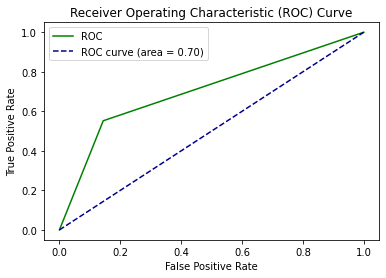

In [166]:
#Plotting the roc cuvrve 
plt.plot(fpr, tpr, color='green', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)'% auc )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [167]:
#Hence the accuracy of Logistic regression and  confusion matrix are same, there is no multicollinearity.

In [ ]:
#Lets build our KNN model 

In [168]:
#importing the KNN libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [169]:
#Lets fit our data in knn model and try to know how well it performs

In [170]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [171]:
y_predict1 = knn.predict(x_test)
y_predict1

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [172]:
# check themodel confidence on training data
knn.score(x_train,y_train)

0.8350694444444444

In [173]:
#Checking the accuracy 
accuracy1 = accuracy_score(y_test,y_predict1)
accuracy1

0.7239583333333334

In [174]:
#lets try to increase the accuracy using hyperparameter tuning[Randomized searchCV]
param_random = {'algorithm': ['ball_tree', 'kd_tree', 'brute'] ,
                'leaf_size': [5,9,15,23,27,32,38],
                'n_neighbors':[2,4,8,12,14,17,19]
               
               }

In [175]:
#Fitting our knn model into randomised search
randomizedsearch = RandomizedSearchCV(knn,param_random,verbose =3)

In [176]:
randomizedsearch.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_neighbors=8, leaf_size=5, algorithm=ball_tree .................
[CV]  n_neighbors=8, leaf_size=5, algorithm=ball_tree, score=0.741, total=   0.2s
[CV] n_neighbors=8, leaf_size=5, algorithm=ball_tree .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_neighbors=8, leaf_size=5, algorithm=ball_tree, score=0.765, total=   0.0s
[CV] n_neighbors=8, leaf_size=5, algorithm=ball_tree .................
[CV]  n_neighbors=8, leaf_size=5, algorithm=ball_tree, score=0.748, total=   0.0s
[CV] n_neighbors=8, leaf_size=5, algorithm=ball_tree .................
[CV]  n_neighbors=8, leaf_size=5, algorithm=ball_tree, score=0.748, total=   0.0s
[CV] n_neighbors=8, leaf_size=5, algorithm=ball_tree .................
[CV]  n_neighbors=8, leaf_size=5, algorithm=ball_tree, score=0.748, total=   0.0s
[CV] n_neighbors=19, leaf_size=32, algorithm=kd_tree .................
[CV]  n_neighbors=19, leaf_size=32, algorithm=kd_tree, score=0.750, total=   0.0s
[CV] n_neighbors=19, leaf_size=32, algorithm=kd_tree .................
[CV]  n_neighbors=19, leaf_size=32, algorithm=kd_tree, score=0.791, total=   0.0s
[CV] n_neighbors=19, leaf_size=32, algorithm=kd_tree .................
[CV]  n_neighbors=19, leaf_size=32, algorithm=kd_tree, score=0.748, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s



[CV] n_neighbors=4, leaf_size=27, algorithm=ball_tree ................
[CV]  n_neighbors=4, leaf_size=27, algorithm=ball_tree, score=0.704, total=   0.0s
[CV] n_neighbors=17, leaf_size=27, algorithm=kd_tree .................
[CV]  n_neighbors=17, leaf_size=27, algorithm=kd_tree, score=0.776, total=   0.0s
[CV] n_neighbors=17, leaf_size=27, algorithm=kd_tree .................
[CV]  n_neighbors=17, leaf_size=27, algorithm=kd_tree, score=0.791, total=   0.0s
[CV] n_neighbors=17, leaf_size=27, algorithm=kd_tree .................
[CV]  n_neighbors=17, leaf_size=27, algorithm=kd_tree, score=0.739, total=   0.0s
[CV] n_neighbors=17, leaf_size=27, algorithm=kd_tree .................
[CV]  n_neighbors=17, leaf_size=27, algorithm=kd_tree, score=0.739, total=   0.0s
[CV] n_neighbors=17, leaf_size=27, algorithm=kd_tree .................
[CV]  n_neighbors=17, leaf_size=27, algorithm=kd_tree, score=0.748, total=   0.0s
[CV] n_neighbors=14, leaf_size=9, algorithm=ball_tree ................
[CV]  n_n

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished


RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': [5, 9, 15, 23, 27, 32, 38],
                                        'n_neighbors': [2, 4, 8, 12, 14, 17,
                                                        19]},
                   verbose=3)

In [177]:
#Getting the best parameters from above data.
randomizedsearch.best_params_

{'n_neighbors': 19, 'leaf_size': 32, 'algorithm': 'kd_tree'}

In [178]:
#Fitting the best parameters into the  KNN model
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 32, n_neighbors = 19)

In [179]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=32, n_neighbors=19)

In [180]:
knn.score(x_test,y_test)

0.765625

In [181]:
#Checking the prediction using hyper parameter
y_predict2  = knn.predict(x_test)
y_predict2

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [182]:
accuracy2 = accuracy_score(y_test,y_predict2)
accuracy2

0.765625

In [183]:
#Great! By compairing accuracy1 & accuracy2, our model accuracy has increased by tuning,
#Now lets try to find F1 score

In [186]:
import numpy as np
confusion_matrix1 = confusion_matrix(y_test,y_predict1)
confusion_matrix1

array([[103,  22],
       [ 31,  36]], dtype=int64)

In [187]:
true_positive = confusion_matrix1[0][0]
false_positive = confusion_matrix1[0][1]
false_negative = confusion_matrix1[1][0]
true_negative= confusion_matrix1[1][1]

In [188]:
 #Accuracy
Accuracy3 = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy3

0.7239583333333334

In [189]:
#precision
Precision1 = true_positive/(true_positive+false_positive)
Precision1

0.824

In [190]:
# Recall
Recall_1 = true_positive/(true_positive+false_negative)
Recall_1

0.7686567164179104

In [191]:
# F1 Score
F1_Score1 = 2*(Recall_1 * Precision1) / (Recall_1 + Precision1)
F1_Score1

0.7953667953667953

In [192]:
#To find roc of Knn model

In [193]:
 fpr1,tpr1, thresholds1 = roc_curve(y_test, y_predict1)

In [194]:
fpr1

array([0.   , 0.176, 1.   ])

In [195]:
tpr1

array([0.        , 0.53731343, 1.        ])

In [196]:
thresholds1

array([2, 1, 0], dtype=int64)

In [200]:
auc1 = roc_auc_score(y_test, y_predict1)
auc1

0.6806567164179105

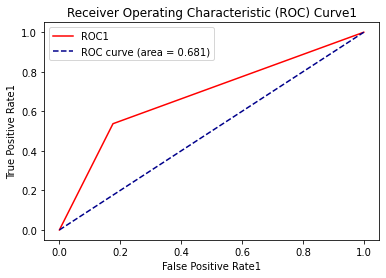

In [202]:
#Lets plot the roc curve for knn model
plt.plot(fpr1, tpr1, color='red', label='ROC1')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.3f)'% auc1 )
plt.xlabel('False Positive Rate1')
plt.ylabel('True Positive Rate1')
plt.title('Receiver Operating Characteristic (ROC) Curve1')
plt.legend()
plt.show()

In [ ]:
#Decision Tree

In [241]:
# Now we will move to decision tree and try to check accuracy,PCA,F1 score and ROC

In [242]:
#importing libraries
import pandas as pd
import numpy as np
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
#Building decision tree model
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [245]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(X)

In [246]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size= 0.25)

In [247]:
#Lets check of our training data
clf.score(x_train,y_train)

0.9131944444444444

In [248]:
#Predicting the data using x_test
y_predict3 = clf.predict(x_test)

In [249]:
y_predict3

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [250]:
clf.score(x_test,y_test)

0.9114583333333334

In [251]:
#Checing the accuracy of predicting data
accuracy = accuracy_score(y_test,y_predict3)
accuracy

0.9114583333333334

In [252]:
#test vs pred same accuracy obtained ,no multicollinearity .

In [253]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [254]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.25)

In [255]:
#lets try to increase our accuracy using PCA for feature selection
#To find best features we use PCA
#scree plot will use to fix best features and while creating components
#PCA can do multicollinearity behind the scene


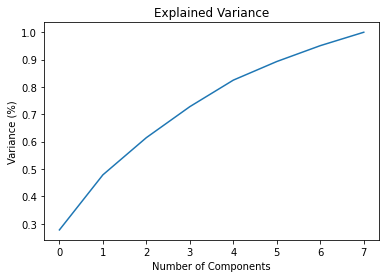

In [256]:
#Lets plot scree plot to find best features
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()


In [257]:
#with the help of this graph we can choose how many components 
#here by observing this graph we can choose 6 component as best  
#features to get 95%


In [258]:
pca = PCA(n_components=6)
new_data = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6'])

In [259]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6
0,1.413826,-0.721063,0.052301,0.646987,-0.408649,-0.766620
1,-1.488193,0.269298,-0.404581,0.080989,-0.311646,0.476852
2,0.097191,-1.010561,1.856833,0.351295,0.020405,-1.469365
3,-1.944223,0.468912,-0.386236,-0.630395,-0.124954,0.361518
4,1.163867,3.569660,1.989982,4.663697,-0.136047,-1.100632
...,...,...,...,...,...,...
763,2.126914,-1.666522,-0.888998,-0.002805,-2.332979,1.038521
764,-0.320357,0.620568,-0.597236,-0.368207,0.098728,-0.513647
765,-0.721179,-0.649334,0.261055,-0.545906,-0.122867,0.115430
766,-0.717982,-0.462115,0.580671,-0.095678,-0.118346,-0.728469


In [260]:
 # let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.25)

In [261]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7083333333333334

In [262]:
y_predict4= clf.predict(x_test)
y_predict4

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [264]:
accuracy5 = accuracy_score(y_test,y_predict4)
accuracy5

0.7083333333333334

In [265]:
# Here in this case PCA not works for increasing accuracy 
#so no increase in accuracy

In [266]:
#Lets try randomised search cv for tuning the accuracy
random_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,15,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']
    
}

In [267]:
#Passing the  parameters into randomsearch cv
random_search = RandomizedSearchCV(estimator=clf,param_distributions=random_param, cv=5,n_jobs =-1)

In [268]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 15),
                                        'min_samples_leaf': range(1, 8),
                                        'min_samples_split': range(2, 8),
                                        'splitter': ['best', 'random']})

In [269]:
#To find best parameter
best_parameters = random_search.best_params_
print(best_parameters)

{'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 8, 'criterion': 'entropy'}


In [270]:
random_search.best_score_

0.7466716641679161

In [271]:
#Applying the obtained best parameter to decision tree
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =8, min_samples_leaf= 4, min_samples_split= 5, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4,
                       min_samples_split=5, splitter='random')

In [272]:
clf.score(x_test,y_test)

0.7708333333333334

In [91]:
#so here we increased our score using random search. so when compaired with PCA ,
#here with random search we increased our accuracy

In [281]:
#lets try to find the F1 score

In [338]:
import numpy as np
confusion_matrix2 = confusion_matrix(y_test,y_predict3)
confusion_matrix2

array([[72, 47],
       [47, 26]], dtype=int64)

In [339]:
true_positive = confusion_matrix2[0][0]
false_positive = confusion_matrix2[0][1]
false_negative = confusion_matrix2[1][0]
true_negative= confusion_matrix2[1][1]

In [340]:
 #Accuracy
Accuracy4 = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy4

0.5104166666666666

In [341]:
#precision
Precision2 = true_positive/(true_positive+false_positive)
Precision2

0.6050420168067226

In [342]:
# Recall
Recall_2= true_positive/(true_positive+false_negative)
Recall_2

0.6050420168067226

In [343]:
# F1 Score
F1_Score2 = 2*(Recall_2 * Precision2) / (Recall_2 + Precision2)
F1_Score2

0.6050420168067226

In [344]:
#To find roc of Decison tree

In [345]:
 fpr2,tpr2, thresholds2 = roc_curve(y_test, y_predict3)

In [346]:
fpr2

array([0.        , 0.39495798, 1.        ])

In [347]:
tpr2

array([0.        , 0.35616438, 1.        ])

In [348]:
thresholds2

array([2, 1, 0], dtype=int64)

In [349]:
auc = roc_auc_score(y_test, y_predict3)
auc

0.48060320018418334

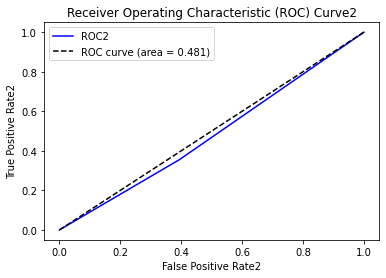

In [337]:
#Plotting roc curve of decision tree
plt.plot(fpr2, tpr2, color='blue', label='ROC2')
plt.plot([0, 1], [0, 1], color='black', linestyle='--',label='ROC curve (area = %0.3f)'% auc )
plt.xlabel('False Positive Rate2')
plt.ylabel('True Positive Rate2')
plt.title('Receiver Operating Characteristic (ROC) Curve2')
plt.legend()
plt.show()

In [108]:
#TO plot ROC,AUC curves for three models at a time

In [302]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd 
from sklearn.metrics import plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [303]:
LR = LogisticRegression()

LR.fit(x_train,y_train)


LogisticRegression()

In [304]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [305]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [306]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [307]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25)

In [308]:
LR.score(x_test,y_test)

0.734375

In [309]:
knn.score(x_test,y_test)

0.84375

In [310]:
clf.score(x_test,y_test)

0.9375

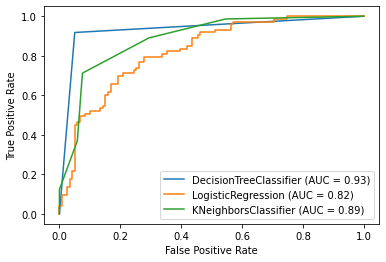

In [311]:
#Plotting the three  roc curves 
disp = plot_roc_curve(clf,x_test,y_test)

plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)

plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)

In [129]:
#Decision tree has max AUC and also has highest score (using metrics above), so we can go with Decision tree technique

In [ ]:
#CONCLUSION: By analysing the three models we can conclude that positive diabetic patients are more in the given data set.